# **Birth Deep Learning Time Series**

**Benedictus Bayu Pramudhito**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

In [ ]:
import os
print('\n'.join(os.listdir(r'./drive/My Drive/Colab Test (Bootcamp ML 2020)')))

bottle.csv
References
Untitled0.ipynb
Week_1_Python_1.ipynb
heart.csv
pima-indians-diabetes.csv
sonar.csv
housing.csv
winequality-white.csv
auto.csv
sales.csv
birth.csv
shampoo.csv
daily-min-temperatures.csv
Quiz
customer.csv
iris.csv
iris (1).csv
Bootcamp Images
parkinsons
numbers_dataset
bottle-updated.csv
auto-mpg.csv
auto (1).csv


In [ ]:
def parser(x):
  return datetime.strptime(x, '%Y-%m-%d')

In [ ]:
df = pd.read_csv(r'./drive/My Drive/Colab Test (Bootcamp ML 2020)/birth.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

df.head()

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: Births, dtype: int64

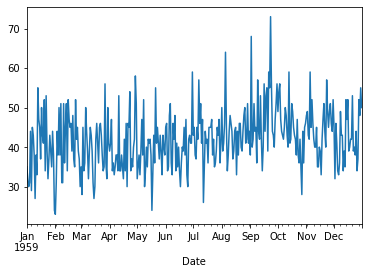

In [ ]:
df.plot()
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error
from math import sqrt

**Processing Time Series Data**

In [ ]:
def timeseries_to_supervised(data, lag=1):
  dataset = pd.DataFrame(data)
  columns = [dataset.shift(i) for i in range(1, lag+1)]
  columns.append(dataset)
  dataset = pd.concat(columns, axis=1)
  return dataset

def difference(df, interval=1):
  diff = list()
  for i in range(interval, len(df)):
    value = df[i]- df[i - interval]
    diff.append(value)
  return pd.Series(diff)

In [ ]:
lag = 1

raw_values = df.values
diff_values = difference(raw_values, 1)

diff_values

0      -3
1      -2
2       1
3      13
4     -15
       ..
359     3
360    15
361    -4
362     7
363    -5
Length: 364, dtype: int64

In [ ]:
supervised = timeseries_to_supervised(diff_values, lag)
supervised

,0,0
0,NaN,-3
1,-3.0,-2
2,-2.0,1
3,1.0,13
4,13.0,-15
...,...,...
359,-10.0,3
360,3.0,15
361,15.0,-4
362,-4.0,7


In [ ]:
supervised_values = supervised.values[lag:,:]
supervised_values

array([[ -3.,  -2.],
       [ -2.,   1.],
       [  1.,  13.],
       [ 13., -15.],
       [-15.,  16.],
       [ 16.,  -2.],
       [ -2.,  -5.],
       [ -5., -11.],
       [-11.,  11.],
       [ 11.,  -5.],
       [ -5.,  22.],
       [ 22.,  -8.],
       [ -8.,  -2.],
       [ -2.,  -8.],
       [ -8.,  13.],
       [ 13.,  -7.],
       [ -7.,  -2.],
       [ -2.,  11.],
       [ 11., -18.],
       [-18.,  19.],
       [ 19., -14.],
       [-14.,  -7.],
       [ -7.,   5.],
       [  5.,   6.],
       [  6.,  -4.],
       [ -4.,  -4.],
       [ -4.,   9.],
       [  9.,  -6.],
       [ -6., -14.],
       [-14.,  -1.],
       [ -1.,   8.],
       [  8.,  13.],
       [ 13.,  -6.],
       [ -6.,  12.],
       [ 12., -12.],
       [-12.,  13.],
       [ 13., -20.],
       [-20.,   0.],
       [  0.,  20.],
       [ 20., -15.],
       [-15.,   9.],
       [  9.,   6.],
       [  6., -17.],
       [-17.,  18.],
       [ 18.,  -5.],
       [ -5.,  -2.],
       [ -2.,   1.],
       [  1.,

In [ ]:
split_percentage = 0.75

train_size = int(split_percentage * len(supervised_values))

train, test = supervised_values[0:train_size], supervised_values[train_size:len(supervised_values)]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1)) # Range hasil scaling menjadi angka diantara -1 hingga 1
scaler = scaler.fit(train)

train_scaled = scaler.transform(train)
test_scaled = scaler.transform(test)

In [ ]:
train_scaled

array([[-1.37931034e-01, -1.03448276e-01],
       [-1.03448276e-01, -6.93889390e-17],
       [-6.93889390e-17,  4.13793103e-01],
       [ 4.13793103e-01, -5.51724138e-01],
       [-5.51724138e-01,  5.17241379e-01],
       [ 5.17241379e-01, -1.03448276e-01],
       [-1.03448276e-01, -2.06896552e-01],
       [-2.06896552e-01, -4.13793103e-01],
       [-4.13793103e-01,  3.44827586e-01],
       [ 3.44827586e-01, -2.06896552e-01],
       [-2.06896552e-01,  7.24137931e-01],
       [ 7.24137931e-01, -3.10344828e-01],
       [-3.10344828e-01, -1.03448276e-01],
       [-1.03448276e-01, -3.10344828e-01],
       [-3.10344828e-01,  4.13793103e-01],
       [ 4.13793103e-01, -2.75862069e-01],
       [-2.75862069e-01, -1.03448276e-01],
       [-1.03448276e-01,  3.44827586e-01],
       [ 3.44827586e-01, -6.55172414e-01],
       [-6.55172414e-01,  6.20689655e-01],
       [ 6.20689655e-01, -5.17241379e-01],
       [-5.17241379e-01, -2.75862069e-01],
       [-2.75862069e-01,  1.37931034e-01],
       [ 1.

## **Baseline Model**

In [ ]:
neurons = 1
epoch = 1000
batch_size = 32

X_train, y_train = train_scaled[:, 0:-1], train_scaled[:, -1]
X_test, y_test = test_scaled[:, 0:-1], test_scaled[:, -1]

model = Sequential()
model.add(Dense(neurons, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, y_train, epochs=epoch, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/1000
9/9 [==============================] - 0s 15ms/step - loss: 0.4164 - val_loss: 0.2627
Epoch 2/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3991 - val_loss: 0.2513
Epoch 3/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3839 - val_loss: 0.2401
Epoch 4/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3689 - val_loss: 0.2297
Epoch 5/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.3552 - val_loss: 0.2203
Epoch 6/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3422 - val_loss: 0.2119
Epoch 7/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3311 - val_loss: 0.2039
Epoch 8/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3195 - val_loss: 0.1968
Epoch 9/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3097 - val_loss: 0.1901
Epoch 10/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3001 - val_loss: 0.1842
Epoch 11/1000
9/9 

In [ ]:
loss = model.evaluate(X_test, y_test, verbose=2)

print('Test loss:', loss)

3/3 - 0s - loss: 0.0694
Test loss: 0.06939747184515


In [ ]:
def plot_loss_new(history):
  history_df = pd.DataFrame(history.history)

  min_loss_index = history_df[history_df['loss']==min(history_df['loss'])].index.values
  min_loss = history_df.loc[min_loss_index]['loss']
  min_val_loss_index = history_df[history_df['val_loss']==min(history_df['val_loss'])].index.values
  min_val_loss = history_df.loc[min_val_loss_index]['val_loss']

  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.plot(min_loss_index, min_loss, 'o', c='k', ms=4, label='min loss')
  plt.plot(min_val_loss_index, min_val_loss, 'o', c='k', ms=4, label='min val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)
  plt.show()

  print('Minimum Loss             :', min_loss)
  print()
  print('Minimum Validation Loss  :', min_val_loss)

In [ ]:
history_dataframe = pd.DataFrame(history.history)
history_dataframe['epoch'] = history.epoch
history_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
599,0.110773,0.069397,599
350,0.110777,0.069397,350
515,0.110777,0.069397,515
827,0.110770,0.069397,827
798,0.110828,0.069397,798
...,...,...,...
4,0.355183,0.220252,4
3,0.368895,0.229725,3
2,0.383898,0.240056,2
1,0.399058,0.251250,1


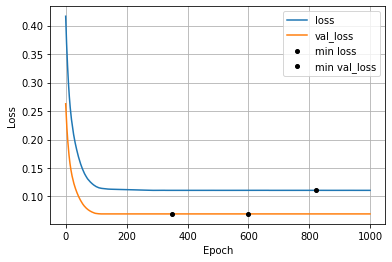

Minimum Loss             : 823    0.110743
Name: loss, dtype: float64

Minimum Validation Loss  : 350    0.069397
599    0.069397
Name: val_loss, dtype: float64


In [ ]:
plot_loss_new(history)

## **Deeper Model**

In [ ]:
neurons = 1
epoch = 1000
batch_size = 32

deeper = Sequential()
deeper.add(Dense(neurons, activation='relu', input_dim=X_train.shape[1]))
deeper.add(Dense(5, activation='relu'))
deeper.add(Dense(1))
deeper.compile(loss='mean_squared_error', optimizer='adam')

history_deep = deeper.fit(X_train, y_train, epochs=epoch, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/1000
9/9 [==============================] - 0s 12ms/step - loss: 0.0887 - val_loss: 0.0557
Epoch 2/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.0869 - val_loss: 0.0548
Epoch 3/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.0857 - val_loss: 0.0543
Epoch 4/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.0847 - val_loss: 0.0539
Epoch 5/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.0838 - val_loss: 0.0536
Epoch 6/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.0833 - val_loss: 0.0535
Epoch 7/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.0827 - val_loss: 0.0534
Epoch 8/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.0823 - val_loss: 0.0533
Epoch 9/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.0821 - val_loss: 0.0533
Epoch 10/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.0819 - val_loss: 0.0533
Epoch 11/1000
9/9 

In [ ]:
history_deep_df = pd.DataFrame(history_deep.history)
history_deep_df['epoch'] = history_deep.epoch
history_deep_df.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
8,0.082077,0.053304,8
9,0.081899,0.053325,9
7,0.082345,0.053330,7
10,0.081499,0.053346,10
6,0.082693,0.053370,6
...,...,...,...
429,0.080462,0.054960,429
646,0.080525,0.054970,646
796,0.080647,0.055000,796
802,0.080672,0.055003,802


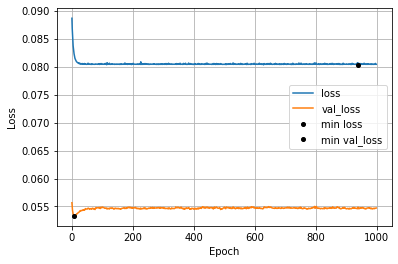

Minimum Loss             : 938    0.080351
Name: loss, dtype: float64

Minimum Validation Loss  : 8    0.053304
Name: val_loss, dtype: float64


In [ ]:
plot_loss_new(history_deep)

## **Wider Model**

In [ ]:
neurons = 50
epoch = 1000
batch_size = 32

wider = Sequential()
wider.add(Dense(neurons, activation='relu', input_dim=X_train.shape[1]))
wider.add(Dense(1))
wider.compile(loss='mean_squared_error', optimizer='adam')

history_wide = wider.fit(X_train, y_train, epochs=epoch, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/1000
9/9 [==============================] - 0s 12ms/step - loss: 0.1653 - val_loss: 0.0879
Epoch 2/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.1379 - val_loss: 0.0756
Epoch 3/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.1201 - val_loss: 0.0678
Epoch 4/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.1074 - val_loss: 0.0630
Epoch 5/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.0999 - val_loss: 0.0601
Epoch 6/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.0944 - val_loss: 0.0579
Epoch 7/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.0904 - val_loss: 0.0570
Epoch 8/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.0883 - val_loss: 0.0561
Epoch 9/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.0866 - val_loss: 0.0560
Epoch 10/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.0855 - val_loss: 0.0561
Epoch 11/1000
9/9 

In [ ]:
history_wide_df = pd.DataFrame(history_wide.history)
history_wide_df['epoch'] = history_wide.epoch
history_wide_df.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
144,0.080726,0.054091,144
481,0.080532,0.054169,481
604,0.080298,0.054170,604
196,0.080424,0.054178,196
751,0.080509,0.054193,751
...,...,...,...
4,0.099879,0.060071,4
3,0.107351,0.062989,3
2,0.120056,0.067765,2
1,0.137851,0.075556,1


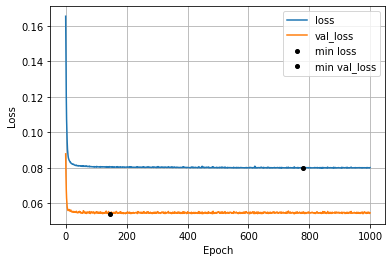

Minimum Loss             : 779    0.079895
Name: loss, dtype: float64

Minimum Validation Loss  : 144    0.054091
Name: val_loss, dtype: float64


In [ ]:
plot_loss_new(history_wide)

## **LSTM Model**

In [ ]:
from tensorflow.keras.layers import LSTM

In [ ]:
epoch = 1000
batch_size = 32

X_train_reshaped = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

lstm = Sequential()
lstm.add(LSTM(50, activation='relu', input_dim=X_train.shape[1])) #50 LSTM block
lstm.add(Dense(1))
lstm.compile(optimizer='adam', loss='mean_squared_error')

history_lstm = lstm.fit(X_train_reshaped, y_train, epochs=epoch, batch_size=batch_size, validation_data=(X_test_reshaped, y_test))

Epoch 1/1000
9/9 [==============================] - 0s 24ms/step - loss: 0.1103 - val_loss: 0.0683
Epoch 2/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.1070 - val_loss: 0.0666
Epoch 3/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.1045 - val_loss: 0.0653
Epoch 4/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.1023 - val_loss: 0.0644
Epoch 5/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.1006 - val_loss: 0.0635
Epoch 6/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.0991 - val_loss: 0.0627
Epoch 7/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.0976 - val_loss: 0.0620
Epoch 8/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.0964 - val_loss: 0.0612
Epoch 9/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.0952 - val_loss: 0.0607
Epoch 10/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.0940 - val_loss: 0.0602
Epoch 11/1000
9/9 

In [ ]:
history_lstm_df = pd.DataFrame(history_lstm.history)
history_lstm_df['epoch'] = history_lstm.epoch
history_lstm_df.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
49,0.080915,0.054768,49
50,0.080822,0.054803,50
359,0.080426,0.054804,359
806,0.080374,0.054861,806
688,0.080576,0.054870,688
...,...,...,...
4,0.100573,0.063457,4
3,0.102269,0.064363,3
2,0.104480,0.065291,2
1,0.106986,0.066592,1


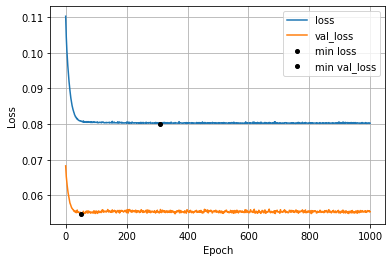

Minimum Loss             : 310    0.08015
Name: loss, dtype: float64

Minimum Validation Loss  : 49    0.054768
Name: val_loss, dtype: float64


In [ ]:
plot_loss_new(history_lstm)

## **Kesimpulan**

Sweet spot val_loss pada tiap model

1. Baseline model : epoch 350 dengan val_loss 0.069397
2. Deeper Model : epoch 8 dengan val_loss 0.053304
3. Wider Model : epoch 144 dengan val_loss 0.054091
4. LSTM Model : epoch 49 dengan val_loss 0.054768

Arsitektur terbaik adalah arsitektur dengan Deep Learning Deeper Model karena memiliki nilai val_loss yang paling kecil dibanding model lainnya
